This program trains a neural network model to classify images of clothing, like sneakers and shirts.


In [6]:
#I will use tf.keras, a high level API to build and train models in TensorFlow
from __future__ import absolute_import, division, print_function, unicode_literals
 #TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

 #Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


Information about the Fashion MNIST dataset

The dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels)

In this program, I will use 60,000 images to train the network and 10,000 images to evalue how accurately the network learn to classify images.

In [7]:
#Directly import the Fashion MNIST diretly from TensorFlow
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

Label	Class
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot



In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Exploring the dataset

In [9]:
train_images.shape
#60,000 labels
#Each image is represented as 28 x 28 pixel

(60000, 28, 28)

In [10]:
len(train_labels)
#60,000 labels in the training set

60000

In [11]:
train_labels
# each label is an integer between 0 and 9.

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Preprocess the data


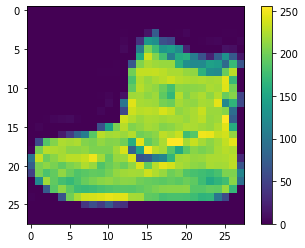

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
#now I scale these values to a range of 0 to 1 before feeding to the neural network model. For this, I divide the values by 255. It’s important that the training set and the testing set are preprocessed in the same way:
train_images = train_images / 255.0

test_images = test_images / 255.0

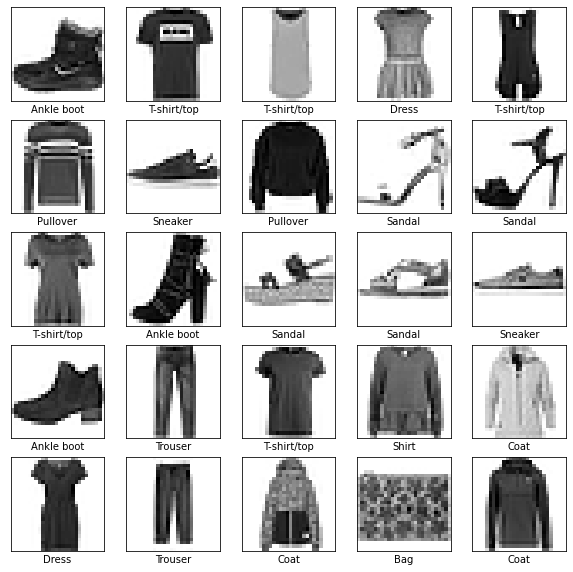

In [15]:
#Display the first 25 images from the training set and display the class name below each image.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Building the model. The first step requires configuring the layers of the model.


Setup the layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. And, hopefully, these representations are more meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, like tf.keras.layers.Dense, have parameters that are learned during training.




In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    #The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.
    keras.layers.Dense(128, activation=tf.nn.relu),
    #After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons). 
    keras.layers.Dense(10, activation=tf.nn.softmax)
    #The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.
])

Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model’s compile step:

Loss function —This measures how accurate the model is during training. We want to minimize this function to “steer” the model in the right direction.

Optimizer —This is how the model is updated based on the data it sees and its loss function.

Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.


In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Training the model

Training the neural network model requires the following steps:
Feed the training data to the model—in this example, the train_images and train_labels arrays.

The model learns to associate images and labels.

We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.

To start training, call the model.fit method—the model is “fit” to the training data:





In [20]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0572 - accuracy: 0.6710
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6249 - accuracy: 0.7757
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5526 - accuracy: 0.8033
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5120 - accuracy: 0.8191
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4847 - accuracy: 0.8289


In [21]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4657 - accuracy: 0.8370
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4509 - accuracy: 0.8417
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4392 - accuracy: 0.8450
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4295 - accuracy: 0.8477
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4213 - accuracy: 0.8515
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4140 - accuracy: 0.8539
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4073 - accuracy: 0.8558
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4010 - accuracy: 0.8585
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3948 - accuracy: 0.8605
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.390

Evaluate accuracy
Next, compare how the model performs on the test dataset:






In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)
#if training accuraccy is higer then testing, could be overfitting

313/313 [==============================] - 0s 1ms/step - loss: 0.4253 - accuracy: 0.8476
Test accuracy: 0.847599983215332


Now the model is train, it can be used to make prediction

In [25]:
predictions = model.predict(test_images)


In [24]:
predictions[0]


array([4.8199655e-07, 1.9683611e-08, 1.8375529e-06, 8.7550410e-07,
       7.2654866e-06, 1.3507198e-01, 1.1282751e-05, 1.6455458e-01,
       2.1917359e-03, 6.9815993e-01], dtype=float32)

In [26]:
np.argmax(predictions[0])


9

In [27]:
test_labels[0]


9

In [29]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

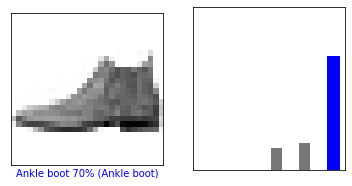

In [30]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

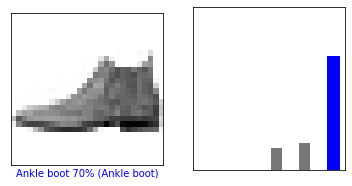

In [31]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let’s plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident.

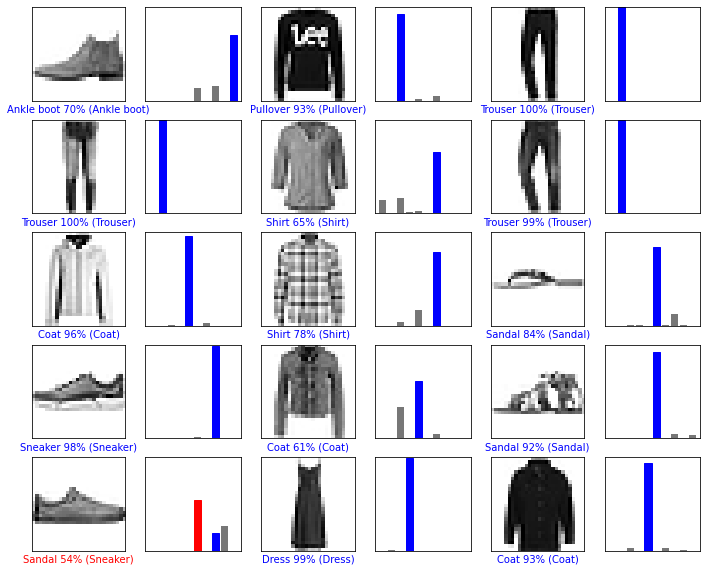

In [32]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.show()

In [33]:
#Finally, use the trained model to make a prediction about a single image.
# Grab an image from the test dataset
img = test_images[1]

print(img.shape)

(28, 28)


In [34]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [35]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.2245935e-04 9.6031363e-06 9.2608279e-01 1.0018375e-04 2.5566684e-02
  6.9425332e-10 4.7812868e-02 3.6775394e-16 1.0545498e-04 4.7078070e-13]]


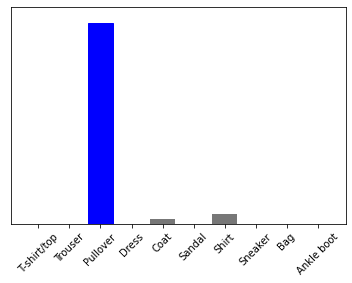

In [36]:
plot_value_array(1, predictions_single[0], test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [37]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)
#model predicts 2 which is trouser

2
